# Content Based Filtering

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity

## Make a sample dataframe

In [3]:
df = pd.DataFrame({'title':['A','B','C','D','E','F','G','H','I','J'],
                   'genre':['comedy','horror','action','comedy','horror','action','comedy','horror','action','comedy'],
                   'label':['PT. A', 'PT. A', 'PT. B', 'PT. B', 'PT. B', 'PT. A', 'PT. A', 'PT. B', 'PT. B', 'PT. A']})

df

,title,genre,label
0,A,comedy,PT. A
1,B,horror,PT. A
2,C,action,PT. B
3,D,comedy,PT. B
4,E,horror,PT. B
5,F,action,PT. A
6,G,comedy,PT. A
7,H,horror,PT. B
8,I,action,PT. B
9,J,comedy,PT. A


In [4]:
cv = CountVectorizer()
mat_genre = cv.fit_transform(df['genre'])
mat_genre

<10x3 sparse matrix of type '<class 'numpy.int64'>'
	with 10 stored elements in Compressed Sparse Row format>

In [5]:
print(mat_genre)

  (0, 1)	1
  (1, 2)	1
  (2, 0)	1
  (3, 1)	1
  (4, 2)	1
  (5, 0)	1
  (6, 1)	1
  (7, 2)	1
  (8, 0)	1
  (9, 1)	1


In [6]:
mat_genre.toarray()

array([[0, 1, 0],
       [0, 0, 1],
       [1, 0, 0],
       [0, 1, 0],
       [0, 0, 1],
       [1, 0, 0],
       [0, 1, 0],
       [0, 0, 1],
       [1, 0, 0],
       [0, 1, 0]])

In [7]:
cv.get_feature_names()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['action', 'comedy', 'horror']

In [9]:
co_score = cosine_similarity(mat_genre)
co_score

array([[1., 0., 0., 1., 0., 0., 1., 0., 0., 1.],
       [0., 1., 0., 0., 1., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 1., 0., 0., 1., 0.],
       [1., 0., 0., 1., 0., 0., 1., 0., 0., 1.],
       [0., 1., 0., 0., 1., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 1., 0., 0., 1., 0.],
       [1., 0., 0., 1., 0., 0., 1., 0., 0., 1.],
       [0., 1., 0., 0., 1., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 1., 0., 0., 1., 0.],
       [1., 0., 0., 1., 0., 0., 1., 0., 0., 1.]])

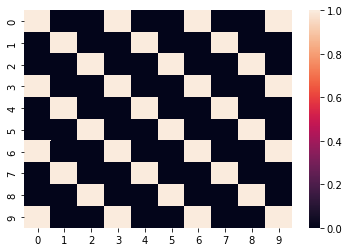

In [10]:
import seaborn as sns
sns.heatmap(co_score)

In [11]:
similar_products = list(enumerate(co_score[0]))
similar_products

[(0, 1.0),
 (1, 0.0),
 (2, 0.0),
 (3, 1.0),
 (4, 0.0),
 (5, 0.0),
 (6, 1.0),
 (7, 0.0),
 (8, 0.0),
 (9, 1.0)]

In [12]:
similar_products = sorted(similar_products, key=lambda x: x[1], reverse=True)
similar_products[:3]

[(0, 1.0), (3, 1.0), (6, 1.0)]

In [14]:
for i in similar_products[:3]:
    print(df.iloc[i[0]])

title         A
genre    comedy
label     PT. A
Name: 0, dtype: object
title         D
genre    comedy
label     PT. B
Name: 3, dtype: object
title         G
genre    comedy
label     PT. A
Name: 6, dtype: object


In [16]:
df[df['genre']=='comedy']

,title,genre,label
0,A,comedy,PT. A
3,D,comedy,PT. B
6,G,comedy,PT. A
9,J,comedy,PT. A


# Anime Recommender System

## Load Data

You can get dataset from here:
- animes and rating: https://github.com/nestor94/animender/tree/master/data 

In [22]:
animes = pd.read_csv('https://raw.githubusercontent.com/nestor94/animender/master/data/anime.csv')

In [26]:
ratings = pd.read_csv('/content/rating.csv')

In [27]:
animes.shape

(12294, 7)

In [28]:
ratings.shape

(7813737, 3)

In [29]:
ratings

,user_id,anime_id,rating
0,1,20,-1
1,1,24,-1
2,1,79,-1
3,1,226,-1
4,1,241,-1
...,...,...,...
7813732,73515,16512,7
7813733,73515,17187,9
7813734,73515,22145,10
7813735,73516,790,9


In [30]:
animes.head()

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266


In [31]:
import string as str
animes[animes['name'].str.contains('Naruto')]

,anime_id,name,genre,type,episodes,rating,members
486,28755,Boruto: Naruto the Movie,"Action, Comedy, Martial Arts, Shounen, Super P...",Movie,1,8.03,74690
615,1735,Naruto: Shippuuden,"Action, Comedy, Martial Arts, Shounen, Super P...",TV,Unknown,7.94,533578
719,16870,The Last: Naruto the Movie,"Action, Martial Arts, Romance, Shounen, Super ...",Movie,1,7.88,85013
784,13667,Naruto: Shippuuden Movie 6 - Road to Ninja,"Action, Adventure, Martial Arts, Shounen, Supe...",Movie,1,7.84,87369
841,20,Naruto,"Action, Comedy, Martial Arts, Shounen, Super P...",TV,220,7.81,683297
1103,32365,Boruto: Naruto the Movie - Naruto ga Hokage ni...,"Action, Comedy, Martial Arts, Shounen, Super P...",Special,1,7.68,16868
1237,10589,Naruto: Shippuuden Movie 5 - Blood Prison,"Action, Adventure, Martial Arts, Mystery, Shou...",Movie,1,7.62,75660
1343,10075,Naruto x UT,"Action, Comedy, Martial Arts, Shounen, Super P...",OVA,1,7.58,23465
1472,8246,Naruto: Shippuuden Movie 4 - The Lost Tower,"Action, Comedy, Martial Arts, Shounen, Super P...",Movie,1,7.53,84527
1573,6325,Naruto: Shippuuden Movie 3 - Hi no Ishi wo Tsu...,"Action, Comedy, Martial Arts, Shounen, Super P...",Movie,1,7.50,83515


## Data Preprocessing

### Drop NaN values

In [32]:
animes.dropna(subset=['genre','type','rating'], inplace=True)
animes.shape

(12017, 7)

In [33]:
animes.genre.value_counts()

Hentai                                                   816
Comedy                                                   521
Music                                                    297
Kids                                                     197
Comedy, Slice of Life                                    174
                                                        ... 
Adventure, Comedy, Horror, Shounen, Supernatural           1
Comedy, Harem, Romance, School, Seinen, Slice of Life      1
Comedy, Ecchi, Sci-Fi, Shounen                             1
Adventure, Shounen, Sports                                 1
Hentai, Slice of Life                                      1
Name: genre, Length: 3229, dtype: int64

### Count Vectorizer

**CountVectorizer** offers a simple way to both tokenize text data and build a vocabulary of known words.

In [34]:
cvt = CountVectorizer(tokenizer = lambda x: x.split(', '))
mgenre = cvt.fit_transform(animes['genre'])

print(len(cvt.get_feature_names()))
print(cvt.get_feature_names())

43
['action', 'adventure', 'cars', 'comedy', 'dementia', 'demons', 'drama', 'ecchi', 'fantasy', 'game', 'harem', 'hentai', 'historical', 'horror', 'josei', 'kids', 'magic', 'martial arts', 'mecha', 'military', 'music', 'mystery', 'parody', 'police', 'psychological', 'romance', 'samurai', 'school', 'sci-fi', 'seinen', 'shoujo', 'shoujo ai', 'shounen', 'shounen ai', 'slice of life', 'space', 'sports', 'super power', 'supernatural', 'thriller', 'vampire', 'yaoi', 'yuri']


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [35]:
mgenre.toarray()[1]

array([1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

## Cosine Similarity

In [36]:
co_score = cosine_similarity(mgenre)
co_score

array([[1.        , 0.18898224, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.18898224, 1.        , 0.28571429, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.28571429, 1.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 1.        , 1.        ,
        1.        ],
       [0.        , 0.        , 0.        , ..., 1.        , 1.        ,
        1.        ],
       [0.        , 0.        , 0.        , ..., 1.        , 1.        ,
        1.        ]])

In [37]:
co_score.shape

(12017, 12017)

Print similarity score for data index = 0

In [38]:
i = 0
print(animes.iloc[i])
print(co_score[i])

anime_id                                   32281
name                              Kimi no Na wa.
genre       Drama, Romance, School, Supernatural
type                                       Movie
episodes                                       1
rating                                      9.37
members                                   200630
Name: 0, dtype: object
[1.         0.18898224 0.         ... 0.         0.         0.        ]


In [39]:
exp_anime = 'Kimi no Na wa.'
exp_idx = animes[animes['name'] == exp_anime].index[0]
exp_idx

0

In [40]:
anime_dict = dict(enumerate(co_score[exp_idx]))
anime_dict

{0: 1.0,
 1: 0.1889822365046136,
 2: 0.0,
 3: 0.0,
 4: 0.0,
 5: 0.4472135954999579,
 6: 0.0,
 7: 0.25,
 8: 0.0,
 9: 0.0,
 10: 0.6708203932499369,
 11: 0.5773502691896258,
 12: 0.0,
 13: 0.20412414523193154,
 14: 0.4472135954999579,
 15: 0.5773502691896258,
 16: 0.6708203932499369,
 17: 0.1889822365046136,
 18: 0.0,
 19: 0.20412414523193154,
 20: 0.25,
 21: 0.4082482904638631,
 22: 0.20412414523193154,
 23: 0.1889822365046136,
 24: 0.0,
 25: 0.6123724356957946,
 26: 0.4472135954999579,
 27: 0.1889822365046136,
 28: 0.1889822365046136,
 29: 0.0,
 30: 0.4472135954999579,
 31: 0.4472135954999579,
 32: 0.25,
 33: 0.1889822365046136,
 34: 0.4472135954999579,
 35: 0.5,
 36: 0.25,
 37: 0.25,
 38: 0.1889822365046136,
 39: 0.5,
 40: 0.22360679774997896,
 41: 0.0,
 42: 0.25,
 43: 0.4472135954999579,
 44: 0.25,
 45: 0.6123724356957946,
 46: 0.4472135954999579,
 47: 0.0,
 48: 0.1889822365046136,
 49: 0.25,
 50: 0.2886751345948129,
 51: 0.0,
 52: 0.22360679774997896,
 53: 0.25,
 54: 0.25,
 55: 0.0,


In [43]:
recomm = list()
for k,v in anime_dict.items():
  if anime_dict[k] >= 0.7:
    recomm.append(k)

In [44]:
print(recomm)

[0, 60, 180, 208, 219, 223, 320, 323, 337, 370, 401, 504, 518, 613, 675, 878, 894, 986, 1058, 1111, 1199, 1201, 1435, 1436, 1494, 1548, 1604, 1616, 1631, 1659, 1697, 1771, 1907, 1959, 2027, 2058, 2078, 2088, 2103, 2191, 2279, 2300, 2304, 2405, 2567, 2724, 2775, 3137, 3198, 3200, 3210, 3296, 3529, 3539, 3628, 3689, 3732, 3906, 3912, 4000, 4004, 4199, 4217, 4271, 4361, 4512, 4859, 5029, 5044, 5079, 5125, 5231, 5312, 5344, 5379, 5418, 5453, 5462, 5463, 5510, 5566, 5695, 5729, 5730, 5750, 5784, 5794, 5803, 5832, 5840, 6076, 6116, 6153, 6157, 6321, 6354, 6391, 6399, 6403, 6581, 6731, 6779, 7158, 7222, 7318, 7394, 7465, 7602, 7627, 8362, 8600, 9347, 10081, 10162, 10178, 10204]


In [46]:
print('Recommendation for:', exp_anime)
recommendation = animes.iloc[recomm][1:].sort_values('rating', ascending=False).head(5)
recommendation

Recommendation for: Kimi no Na wa.


,anime_id,name,genre,type,episodes,rating,members
60,10408,Hotarubi no Mori e,"Drama, Romance, Shoujo, Supernatural",Movie,1,8.61,197439
180,18195,Little Busters!: Refrain,"Comedy, Drama, Romance, School, Slice of Life,...",TV,13,8.36,71820
208,28725,Kokoro ga Sakebitagatterunda.,"Drama, Romance, School",Movie,1,8.32,59652
219,23847,Yahari Ore no Seishun Love Comedy wa Machigatt...,"Comedy, Drama, Romance, School",TV,13,8.31,222994
223,2167,Clannad,"Comedy, Drama, Romance, School, Slice of Life,...",TV,23,8.30,566690


## Collaborative Filtering

In [48]:
animes.head(5)

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266


In [49]:
ratings.head(5)

,user_id,anime_id,rating
0,1,20,-1
1,1,24,-1
2,1,79,-1
3,1,226,-1
4,1,241,-1


In [50]:
ratings['rating'].value_counts(dropna='False')

 8     1646019
-1     1476496
 7     1375287
 9     1254096
 10     955715
 6      637775
 5      282806
 4      104291
 3       41453
 2       23150
 1       16649
Name: rating, dtype: int64

In [51]:
num_users = len(ratings.user_id.unique())
num_animes = len(ratings.anime_id.unique())
print('Total unique animes = {} and total users = {}'.format(num_animes, num_users))

Total unique animes = 11200 and total users = 73515


## Exploratory Data Analysis (EDA)

### 1. Plot the counts of each rating

In [52]:
ratings_count = pd.DataFrame(ratings.groupby('rating').size(), columns=['count'])
ratings_count

,count
rating,
-1,1476496
1,16649
2,23150
3,41453
4,104291
5,282806
6,637775
7,1375287
8,1646019


In [53]:
ratings_count['count'].sum()

7813737

In [54]:
total = num_users * num_animes
zero_count = total - ratings.shape[0]
ratings_count = ratings_count.append(pd.DataFrame({'count' : zero_count}, index=[0])).sort_index()
ratings_count

,count
-1,1476496
0,815554263
1,16649
2,23150
3,41453
4,104291
5,282806
6,637775
7,1375287
8,1646019


Text(0, 0.5, 'Number of Ratings')

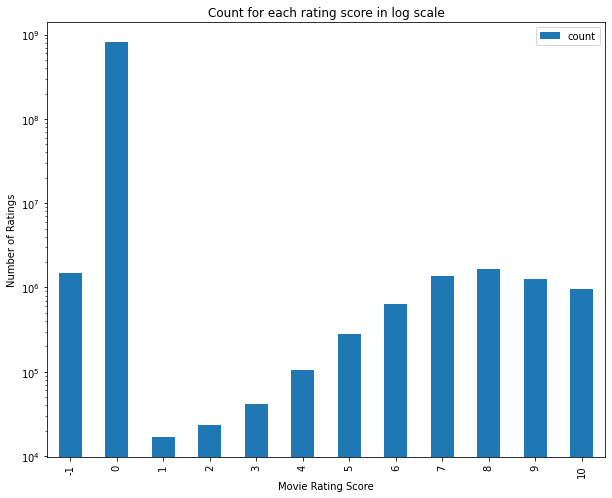

In [56]:
ax = ratings_count[['count']].reset_index().rename(columns={'index': 'rating_score'}).plot(
    x='rating_score',
    y='count',
    kind='bar',
    figsize=(10,8),
    title='Count for each rating score in log scale',
    logy=True,
    fontsize=10)

ax.set_xlabel("Movie Rating Score")
ax.set_ylabel("Number of Ratings")

### 2. Plot rating frequency of all movies

In [57]:
ratings.head()

,user_id,anime_id,rating
0,1,20,-1
1,1,24,-1
2,1,79,-1
3,1,226,-1
4,1,241,-1


In [58]:
anime_count = pd.DataFrame(ratings.groupby('anime_id').size(), columns=['count'])
anime_count.sort_values('count', ascending=False)

,count
anime_id,
1535,39340
11757,30583
16498,29584
1575,27718
226,27506
...,...
23865,1
23863,1
23861,1


In [59]:
animes[animes['anime_id'] == 11757]

,anime_id,name,genre,type,episodes,rating,members
804,11757,Sword Art Online,"Action, Adventure, Fantasy, Game, Romance",TV,25,7.83,893100


In [60]:
ratings[ratings['anime_id']== 11757]['rating'].mean()

6.863159271490697

Text(0, 0.5, 'number of ratings')

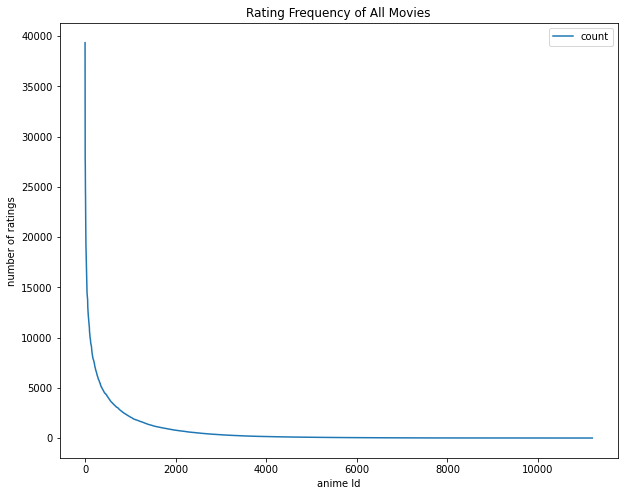

In [61]:
ax = anime_count.sort_values('count', ascending=False).reset_index(drop=True).plot(
    figsize=(10,8),
    title='Rating Frequency of All Movies',
    fontsize=10
)
ax.set_xlabel("anime Id")
ax.set_ylabel('number of ratings')

In [62]:
anime_count[anime_count['count']>=390].sort_values('count')

,count
anime_id,
2499,390
11083,391
9934,391
29325,391
864,392
...,...
226,27506
1575,27718
16498,29584


In [64]:
anime_count[anime_count['count']>=390].sort_values('count')

,count
anime_id,
2499,390
11083,391
9934,391
29325,391
864,392
...,...
226,27506
1575,27718
16498,29584


In [63]:
popularity_thres = 390
popular_animes = list(set(anime_count.query('count >= @popularity_thres').index))
df_popanimes = ratings[ratings['anime_id'].isin(popular_animes)]
df_popanimes

,user_id,anime_id,rating
0,1,20,-1
1,1,24,-1
2,1,79,-1
3,1,226,-1
4,1,241,-1
...,...,...,...
7813732,73515,16512,7
7813733,73515,17187,9
7813734,73515,22145,10
7813735,73516,790,9


In [65]:
print('shape of original ratings data:', ratings.shape)
print('shape of popular animes:', df_popanimes.shape)

shape of original ratings data: (7813737, 3)
shape of popular animes: (7302461, 3)


In [66]:
df_popanimes.head()

,user_id,anime_id,rating
0,1,20,-1
1,1,24,-1
2,1,79,-1
3,1,226,-1
4,1,241,-1


In [67]:
user_counts = pd.DataFrame(df_popanimes.groupby('user_id').size(), columns=['count'])
user_counts.sort_values('count', ascending=False).head()

,count
user_id,
48766,2768
42635,2100
57620,2071
59643,1945
45659,1869


In [68]:
len(user_counts)

73436

Text(0, 0.5, 'number_of_ratings')

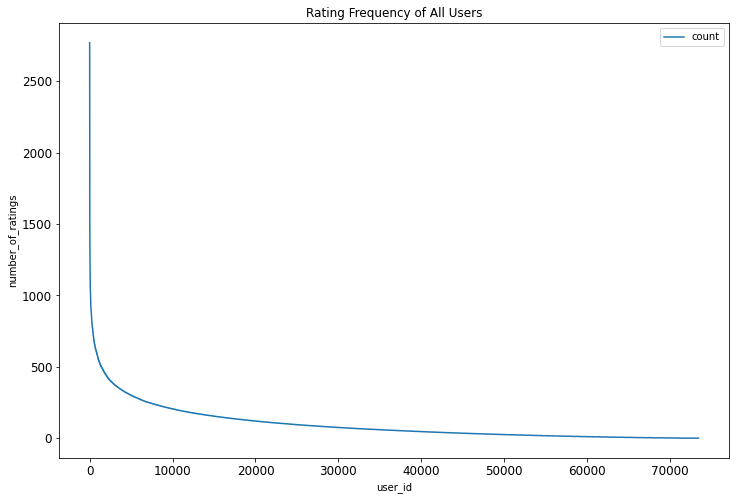

In [69]:
ax = user_counts.sort_values('count', ascending=False).reset_index(drop=True).plot(
    figsize=(12,8),
    title='Rating Frequency of All Users',
    fontsize=12
)
ax.set_xlabel("user_id")
ax.set_ylabel("number_of_ratings")

In [70]:
user_counts['count'].quantile(np.arange(1,0.5,-0.05))

1.00    2768.0
0.95     346.0
0.90     246.0
0.85     193.0
0.80     157.0
0.75     131.0
0.70     109.0
0.65      92.0
0.60      78.0
0.55      66.0
Name: count, dtype: float64

In [71]:
rating_thres = 100
active_users = list(set(user_counts.query('count >= @rating_thres').index))
df_active_users = df_popanimes[df_popanimes['user_id'].isin(active_users)]
print('shape of original ratings data:', ratings.shape)
print('shape of active users:', df_active_users.shape)

shape of original ratings data: (7813737, 3)
shape of active users: (5580347, 3)


## KNN model for item-based collaborative filtering

### 1. Reshaping the Data

In [72]:
# pivot and create movie-user matrix
movie_user_mtx = df_active_users.pivot(index='anime_id', columns='user_id', values='rating')
movie_user_mtx

user_id,1,5,7,11,13,14,17,21,29,35,...,73494,73495,73499,73500,73502,73503,73504,73507,73510,73515
anime_id,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,-1.0,NaN,NaN,9.0,NaN,NaN,...,NaN,10.0,9.0,NaN,NaN,9.0,10.0,9.0,NaN,10.0
5,NaN,NaN,NaN,NaN,-1.0,NaN,NaN,9.0,NaN,NaN,...,NaN,8.0,NaN,NaN,NaN,7.0,10.0,8.0,NaN,10.0
6,NaN,8.0,NaN,NaN,-1.0,NaN,7.0,NaN,NaN,NaN,...,9.0,-1.0,9.0,NaN,NaN,9.0,9.0,9.0,NaN,10.0
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,7.0,NaN,NaN,9.0,NaN,7.0,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33421,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
33524,NaN,NaN,NaN,NaN,NaN,NaN,-1.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
33558,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [73]:
movie_user_mtx = movie_user_mtx.fillna(0)

In [74]:
movie_user_mtx

user_id,1,5,7,11,13,14,17,21,29,35,...,73494,73495,73499,73500,73502,73503,73504,73507,73510,73515
anime_id,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,-1.0,0.0,0.0,9.0,0.0,0.0,...,0.0,10.0,9.0,0.0,0.0,9.0,10.0,9.0,0.0,10.0
5,0.0,0.0,0.0,0.0,-1.0,0.0,0.0,9.0,0.0,0.0,...,0.0,8.0,0.0,0.0,0.0,7.0,10.0,8.0,0.0,10.0
6,0.0,8.0,0.0,0.0,-1.0,0.0,7.0,0.0,0.0,0.0,...,9.0,-1.0,9.0,0.0,0.0,9.0,9.0,9.0,0.0,10.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,7.0,0.0,0.0,9.0,0.0,7.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33421,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
33524,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
33558,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [75]:
list(enumerate(list(animes.set_index('anime_id').loc[movie_user_mtx.index]['name'])))

[(0, 'Cowboy Bebop'),
 (1, 'Cowboy Bebop: Tengoku no Tobira'),
 (2, 'Trigun'),
 (3, 'Witch Hunter Robin'),
 (4, 'Beet the Vandel Buster'),
 (5, 'Eyeshield 21'),
 (6, 'Hachimitsu to Clover'),
 (7, 'Hungry Heart: Wild Striker'),
 (8, 'Initial D Fourth Stage'),
 (9, 'Monster'),
 (10, 'Naruto'),
 (11, 'Prince of Tennis'),
 (12, 'School Rumble'),
 (13, 'Sunabouzu'),
 (14, 'Texhnolyze'),
 (15, 'Trinity Blood'),
 (16, 'Yakitate!! Japan'),
 (17, 'Neon Genesis Evangelion'),
 (18, 'Neon Genesis Evangelion: Death &amp; Rebirth'),
 (19, 'Neon Genesis Evangelion: The End of Evangelion'),
 (20, 'Berserk'),
 (21, 'Ghost in the Shell'),
 (22, 'Rurouni Kenshin: Meiji Kenkaku Romantan - Tsuioku-hen'),
 (23, 'Rurouni Kenshin: Meiji Kenkaku Romantan'),
 (24, 'Rurouni Kenshin: Meiji Kenkaku Romantan - Ishinshishi e no Chinkonka'),
 (25, 'Akira'),
 (26, '.hack//Sign'),
 (27, 'Aa! Megami-sama!'),
 (28, 'Aa! Megami-sama! (TV)'),
 (29, 'Tenshi Kinryouku'),
 (30, 'Kidou Tenshi Angelic Layer'),
 (31, 'Ai Yori Ao

In [77]:
animes_to_idx = {title: i for i, title in enumerate(list(animes.set_index('anime_id').loc[movie_user_mtx.index]['name']))}
animes_to_idx

{'Cowboy Bebop': 0,
 'Cowboy Bebop: Tengoku no Tobira': 1,
 'Trigun': 2,
 'Witch Hunter Robin': 3,
 'Beet the Vandel Buster': 4,
 'Eyeshield 21': 5,
 'Hachimitsu to Clover': 6,
 'Hungry Heart: Wild Striker': 7,
 'Initial D Fourth Stage': 8,
 'Monster': 9,
 'Naruto': 10,
 'Prince of Tennis': 11,
 'School Rumble': 12,
 'Sunabouzu': 13,
 'Texhnolyze': 14,
 'Trinity Blood': 15,
 'Yakitate!! Japan': 16,
 'Neon Genesis Evangelion': 17,
 'Neon Genesis Evangelion: Death &amp; Rebirth': 18,
 'Neon Genesis Evangelion: The End of Evangelion': 19,
 'Berserk': 20,
 'Ghost in the Shell': 21,
 'Rurouni Kenshin: Meiji Kenkaku Romantan - Tsuioku-hen': 22,
 'Rurouni Kenshin: Meiji Kenkaku Romantan': 23,
 'Rurouni Kenshin: Meiji Kenkaku Romantan - Ishinshishi e no Chinkonka': 24,
 'Akira': 25,
 '.hack//Sign': 26,
 'Aa! Megami-sama!': 27,
 'Aa! Megami-sama! (TV)': 28,
 'Tenshi Kinryouku': 29,
 'Kidou Tenshi Angelic Layer': 30,
 'Ai Yori Aoshi': 31,
 'Appleseed (Movie)': 32,
 'Arc the Lad': 33,
 'Avenger':

In [78]:
# index dari dragon ball
animes_to_idx['Dragon Ball']

170

In [79]:
# matrix dari dragon ball
movie_user_mtx.iloc[170]

user_id
1        0.0
5        6.0
7        9.0
11       0.0
13       0.0
        ... 
73503    5.0
73504    0.0
73507    0.0
73510    8.0
73515    0.0
Name: 223, Length: 24085, dtype: float64

In [80]:
movie_user_mtx.values

array([[ 0.,  0.,  0., ...,  9.,  0., 10.],
       [ 0.,  0.,  0., ...,  8.,  0., 10.],
       [ 0.,  8.,  0., ...,  9.,  0., 10.],
       ...,
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.]])

In [81]:
from scipy.sparse import csr_matrix
anime_user_mtx_sparse = csr_matrix(movie_user_mtx.values)

In [82]:
print(anime_user_mtx_sparse)

  (0, 4)	-1.0
  (0, 7)	9.0
  (0, 12)	10.0
  (0, 14)	10.0
  (0, 15)	10.0
  (0, 16)	-1.0
  (0, 20)	10.0
  (0, 31)	9.0
  (0, 32)	10.0
  (0, 35)	10.0
  (0, 38)	9.0
  (0, 39)	8.0
  (0, 43)	7.0
  (0, 44)	8.0
  (0, 48)	10.0
  (0, 50)	8.0
  (0, 51)	10.0
  (0, 54)	8.0
  (0, 55)	9.0
  (0, 61)	10.0
  (0, 64)	9.0
  (0, 65)	-1.0
  (0, 67)	-1.0
  (0, 69)	7.0
  (0, 71)	-1.0
  :	:
  (2791, 23756)	9.0
  (2791, 23758)	-1.0
  (2791, 23772)	10.0
  (2791, 23796)	-1.0
  (2791, 23798)	10.0
  (2791, 23804)	8.0
  (2791, 23805)	-1.0
  (2791, 23816)	8.0
  (2791, 23835)	-1.0
  (2791, 23838)	8.0
  (2791, 23841)	8.0
  (2791, 23856)	-1.0
  (2791, 23862)	9.0
  (2791, 23870)	8.0
  (2791, 23879)	7.0
  (2791, 23880)	8.0
  (2791, 23882)	-1.0
  (2791, 23891)	9.0
  (2791, 23904)	-1.0
  (2791, 23952)	8.0
  (2791, 23957)	-1.0
  (2791, 23968)	8.0
  (2791, 23990)	10.0
  (2791, 23994)	8.0
  (2791, 24041)	9.0


### 2. Fitting the Model

Cosine Similarity

In [83]:
from sklearn.neighbors import NearestNeighbors
nn = NearestNeighbors(metric='cosine', algorithm='brute', n_neighbors=11, n_jobs=-1)
#fitting the model
nn.fit(anime_user_mtx_sparse)

NearestNeighbors(algorithm='brute', metric='cosine', n_jobs=-1, n_neighbors=11)

### 3. Simple Movie Recommender System

In [84]:
import string as str
fav_anime = str.capwords('naruto')
index_fav = animes_to_idx[fav_anime]
distances, indices = nn.kneighbors(movie_user_mtx.iloc[index_fav,:].values.reshape(1,-1), n_neighbors=11)
recom_res = list(zip(indices.squeeze().tolist(), distances.squeeze().tolist()))
recom_res

[(10, 0.0),
 (763, 0.34306324157200907),
 (782, 0.4095199126802932),
 (1873, 0.4117128585974985),
 (89, 0.4136428568635694),
 (1261, 0.4141881572665217),
 (209, 0.41902322613836196),
 (2135, 0.4204547650691697),
 (1006, 0.42840709364171714),
 (1682, 0.4294007894620876),
 (172, 0.43861496509355613)]

In [85]:
distances

array([[0.        , 0.34306324, 0.40951991, 0.41171286, 0.41364286,
        0.41418816, 0.41902323, 0.42045477, 0.42840709, 0.42940079,
        0.43861497]])

In [86]:
indices

array([[  10,  763,  782, 1873,   89, 1261,  209, 2135, 1006, 1682,  172]])

In [87]:
def get_key(val): 
    for key, value in animes_to_idx.items(): 
         if val == value: 
            return key 
  
    return "key doesn't exist"
for i, (idx, dist) in enumerate(recom_res):
    if i == 0:
        print('you have input:',fav_anime)
    else:
        print('{}: {}, with distance of {}'. format(i, get_key(idx), distances.flatten()[i]))

you have input: Naruto
1: Death Note, with distance of 0.34306324157200907
2: Code Geass: Hangyaku no Lelouch, with distance of 0.4095199126802932
3: Sword Art Online, with distance of 0.4117128585974985
4: Fullmetal Alchemist, with distance of 0.4136428568635694
5: Fullmetal Alchemist: Brotherhood, with distance of 0.4141881572665217
6: Bleach, with distance of 0.41902322613836196
7: Shingeki no Kyojin, with distance of 0.4204547650691697
8: Code Geass: Hangyaku no Lelouch R2, with distance of 0.42840709364171714
9: Ao no Exorcist, with distance of 0.4294007894620876
10: Elfen Lied, with distance of 0.43861496509355613


### 4. Make recommender system using fuzzy

In [89]:
! pip3 install fuzzywuzzy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [90]:
from fuzzywuzzy import fuzz

/usr/local/lib/python3.7/dist-packages/fuzzywuzzy/fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


In [92]:
def fuzzy_matching(mapper, fav_anime, verbose=True):
    """
    return the closest match via fuzzy ratio. If no match found, return None
    
    Parameters
    ----------    
    mapper: dict (animes_to_idx), map movie title name to index of the movie in data

    fav_anime: str, name of user input anime
    
    verbose: bool, print log if True

    Return
    ------
    index of the closest match
    """
    match_tuple = []
    # get match
    for title, idx in mapper.items():
        ratio = fuzz.ratio(title.lower(), fav_anime.lower())
        if ratio > 60:
            match_tuple.append((title, idx, ratio))
    # sort
    match_tuple = sorted(match_tuple, key=lambda x: x[2])[::-1]
    if not match_tuple:
        print('Anime yang anda cari tidak ada')
        return
    if verbose:
        print('Anime yang anda cari ditemukan di database kami: {}\n'.format([x[0] for x in match_tuple]))
    return match_tuple[0][1]

def make_recommendation(model_knn, data, mapper, fav_anime, n_recommendation):
    """
    return top n similar movie recommendations based on user's input movie


    Parameters
    ----------
    model_knn: sklearn model, knn model

    data: anime_user_mtx_sparse for training

    mapper: dict (animes_to_idx), map movie title name to index of the movie in data

    fav_anime: str, name of user input movie

    n_recommendations: int, top n recommendations

    Return
    ------
    list of top n similar movie recommendations
    """
    model_knn.fit(data)
    # get input movie index
    print('Anda telah memilih anime: {}'.format(fav_anime))
    idx = fuzzy_matching(mapper, fav_anime, verbose=True)
    print('Sedang memuat anime')
    print('.......\n')
    distances, indices = model_knn.kneighbors(data[idx], n_neighbors=n_recommendation+1)
    # get list of raw index
    raw_recommends = sorted(list(zip(indices.squeeze().tolist(), distances.squeeze().tolist())), key=lambda x:x[1])[:0:-1]
    reverse_mapper = {v: k for k, v in mapper.items()}
    
    print('Rekomendasi untuk: {}'.format(fav_anime))
    for i, (idx, dist) in enumerate(raw_recommends):
        print('{}: {}, dengan distance of {}'.format(i+1, reverse_mapper[idx], dist))

In [93]:
my_favorite = input('Masukkan anime favorit anda:')

make_recommendation(model_knn=nn, data=anime_user_mtx_sparse, fav_anime=my_favorite,
                   mapper=animes_to_idx, n_recommendation=10)

Masukkan anime favorit anda:kimi no nawa
Anda telah memilih anime: kimi no nawa
Anime yang anda cari ditemukan di database kami: ['Kimi no Na wa.', 'Kamigami no Asobi', 'Kyoukai no Kanata', 'Kimi no Iru Machi', 'Aku no Hana']

Sedang memuat anime
.......

Rekomendasi untuk: kimi no nawa
1: Shokugeki no Souma, dengan distance of 0.7291026942078005
2: No Game No Life, dengan distance of 0.7245369855341224
3: Noragami, dengan distance of 0.7208394510751024
4: Noragami Aragoto, dengan distance of 0.7177190689226833
5: One Punch Man, dengan distance of 0.7124364183449896
6: Charlotte, dengan distance of 0.710259425638335
7: ReLIFE, dengan distance of 0.6946104833610212
8: Shigatsu wa Kimi no Uso, dengan distance of 0.6742193753482453
9: Re:Zero kara Hajimeru Isekai Seikatsu, dengan distance of 0.6729928114188376
10: Boku dake ga Inai Machi, dengan distance of 0.6626669902966114
